In [1]:
import scipy as sc
from scipy import signal
import os   #used for directory work
import matplotlib.pyplot as plt #used for creating plots
import pandas as pd
import numpy as np
import matplotlib.patches as mpatches #used for plot legends
%matplotlib inline
from commonly_used_functions import text_finder, burn_dict,\
    file_to_df, fire_period, lin_rb, fast_fourier_spectra
burn_d = burn_dict()

In [2]:
burn_d

{'01': [21000, 22289],
 '02': [14000, 14972],
 '03': [20000, 20296],
 '04': [30000, 34979],
 '05': [15000, 15974],
 '06': [6000, 6544],
 '07': [25000, 27822],
 '08': [18000, 19810],
 '09': [20000, 25047],
 '11': [30000, 30681],
 '12': [60000, 62937],
 '13': [50000, 55131],
 '18': [185000, 192322],
 '19': [45000, 48831],
 '20': [24000, 25860],
 '21': [25000, 27822],
 '22': [27000, 29484],
 '23': [45000, 48846],
 '24': [20000, 23015],
 '25': [25000, 26797],
 '26': [25000, 26909],
 '27': [35000, 36916],
 '28': [27000, 28673],
 '29': [25000, 28166],
 '30': [12000, 13954],
 '31': [30000, 31046],
 '32': [25000, 26294],
 '33': [20000, 23293],
 '34': [40000, 43702]}

In [3]:
path = "/Users/joeyp/Desktop/10X10_Truss_SERDP_Burns/JS_Cleaned_Data/Full-Timestamp/Burn-" #w10
path_end = "/sonics/"
sc_name_lst= ["A1","A2", "A3", "A4", "B1", "B2", "B3", "B4", \
                 "C1", "C2", "C3", "C4", "D1", "D2", "D3", "D4"]
df_pre_averages_eye = pd.DataFrame(columns=["SNC", "U_ave", "V_ave", "W_ave", "T_ave"])
df_pre_averages_first_sonc = pd.DataFrame(columns=["SNC", "U_ave", "V_ave", "W_ave", "T_ave"])
for brn in range(len(list(burn_d.keys()))):
        burn = list(burn_d.keys())[brn]
        p = path+burn+ path_end
        files = text_finder(p)
        for i in range(16):
            df = file_to_df(p+files[i])
            start, end = burn_d[burn][0]-9000, burn_d[burn][0]
            if start<0:
                start = 0
            
            df_pre_averages_eye = df_pre_averages_eye.append({"SNC":"B01A1",\
                "U_ave":np.nanmean(df["U"][start:end]),"V_ave":np.nanmean(df["V"][start:end]),\
                "W_ave":np.nanmean(df["W"][start:end]), \
                "T_ave":np.nanmean(df["T"][start:end])}, ignore_index= True)
            
            start, end = burn_d[burn][1]-(3000+9000), burn_d[burn][1]-3000
            if start<0:
                start = 0
            
            df_pre_averages_first_sonc = df_pre_averages_first_sonc.append({"SNC":"B01A1",\
                "U_ave":np.nanmean(df["U"][start:end]),"V_ave":np.nanmean(df["V"][start:end]),\
                "W_ave":np.nanmean(df["W"][start:end]), \
                "T_ave":np.nanmean(df["T"][start:end])}, ignore_index= True)
            
            

C:\Users\joeyp\anaconda3\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: Mean of empty slice
C:\Users\joeyp\anaconda3\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: Mean of empty slice
C:\Users\joeyp\anaconda3\lib\site-packages\ipykernel_launcher.py:20: RuntimeWarning: Mean of empty slice
C:\Users\joeyp\anaconda3\lib\site-packages\ipykernel_launcher.py:27: RuntimeWarning: Mean of empty slice
C:\Users\joeyp\anaconda3\lib\site-packages\ipykernel_launcher.py:28: RuntimeWarning: Mean of empty slice
C:\Users\joeyp\anaconda3\lib\site-packages\ipykernel_launcher.py:29: RuntimeWarning: Mean of empty slice


In [4]:
print("All burns Pre-Burn averages 'visual time' (15min ave):")
print(df_pre_averages_eye.describe())
print()
print("All burns Pre-Burn averages 5 mins before first 5sig sonic (15min ave):")
print(df_pre_averages_first_sonc.describe())


All burns Pre-Burn averages 'visual time' (15min ave):
            U_ave       V_ave       W_ave       T_ave
count  435.000000  435.000000  435.000000  435.000000
mean     0.548523    0.095462   -0.007782   19.658104
std      0.571149    0.447310    0.056294    7.813450
min     -1.073436   -0.848881   -0.265254    2.302692
25%      0.194572   -0.248897   -0.043418   17.958787
50%      0.554541    0.029449   -0.006797   21.049269
75%      0.970363    0.384736    0.030483   24.004858
max      1.736043    1.466703    0.123970   32.727329

All burns Pre-Burn averages 5 mins before first 5sig sonic (15min ave):
            U_ave       V_ave       W_ave       T_ave
count  435.000000  435.000000  435.000000  435.000000
mean     0.540141    0.092059   -0.007093   19.675759
std      0.559244    0.432161    0.055470    7.818896
min     -1.069083   -0.909336   -0.273476    2.365789
25%      0.144143   -0.220863   -0.043173   18.038052
50%      0.598816    0.017030   -0.005068   21.046579
75%     

NameError: name 'box_01' is not defined

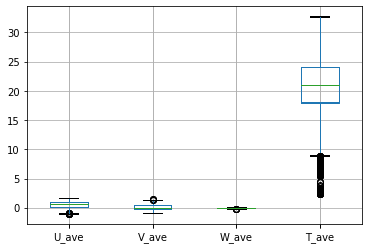

In [5]:
df_pre_averages_eye.boxplot()
df_pre_averages_first_sonc.boxplot()
print(box_01)

In [ ]:
df_pre_averages_first_sonc.boxplot(column = ["U_ave","V_ave","W_ave"])
df_pre_averages_first_sonc.boxplot(column = ["U_ave","V_ave","W_ave"])
#plt.show()

In [ ]:
pd.boxplot([box1,box2])

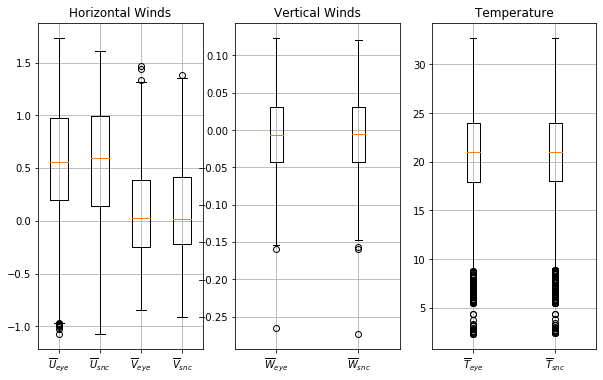

In [40]:
plt_lst, columns = [], ["U_ave","V_ave","W_ave"]
for i in range(3):
    data_01 = [x for x in list(df_pre_averages_eye[columns[i]]) if str(x) != 'nan']
    data_02 = [x for x in list(df_pre_averages_first_sonc[columns[i]]) if str(x) != 'nan']
    plt_lst.append(data_01)
    plt_lst.append(data_02)
#fig = plt.figure(figsize =(6, 4)) 
fig, axs = plt.subplots(nrows=1,ncols=3,figsize=(10,6))#,sharey = True)
# Creating axes instance 
#ax = fig.add_axes([0, 0, 1, 1]) 
  
# Creating plot 
ax1 = axs[0]
ax1.boxplot(plt_lst[:4]) 
ax1.set_xticklabels([r"$\overline{U}_{eye}$",r"$\overline{U}_{snc}$",\
                     r"$\overline{V}_{eye}$",r"$\overline{V}_{snc}$"])
ax1.set_title("Horizontal Winds")
ax1.grid()

ax2 = axs[1]
ax2.boxplot(plt_lst[4:])
ax2.set_title("Vertical Winds")
ax2.set_xticklabels([r"$\overline{W}_{eye}$",r"$\overline{W}_{snc}$"])
ax2.grid()
ax3 = axs[2]
t_1 = [x for x in list(df_pre_averages_eye["T_ave"]) if str(x) != 'nan']
t_2 = [x for x in list(df_pre_averages_first_sonc["T_ave"]) if str(x) != 'nan']
ax3.set_xticklabels([r"$\overline{T}_{eye}$",r"$\overline{T}_{snc}$"])
ax3.boxplot([t_1,t_2])
ax3.set_title("Temperature")
ax3.grid()
plt.savefig("Comparing_averages")


In [ ]:
eye_vs_snc = []
for brn in range(len(list(burn_d.keys()))):
        burn = list(burn_d.keys())[brn]
        eye_vs_snc.append(burn_d[burn][1]-burn_d[burn][0])
print(np.average(eye_vs_snc))

In [ ]:
print(min(eye_vs_snc),max(eye_vs_snc))

In [ ]:
#import pandas as pd
#import numpy as np
#from matplotlib pyplot as plt
import seaborn as sns

#data1 = pd.DataFrame(np.random.rand(17,3), columns=['A','B','C']).assign(Location=1)
#data2 = pd.DataFrame(np.random.rand(17,3)+0.2, columns=['A','B','C']).assign(Location=2)
#data3 = pd.DataFrame(np.random.rand(17,3)+0.4, columns=['A','B','C']).assign(Location=3)

cdf = pd.concat([df_pre_averages_eye, df_pre_averages_first_sonc])    
#mdf = pd.melt(cdf, id_vars=['Location'], var_name=['Letter'])
#print(mdf.head())

#    Location Letter     value
# 0         1      A  0.223565
# 1         1      A  0.515797
# 2         1      A  0.377588
# 3         1      A  0.687614
# 4         1      A  0.094116

ax = sns.boxplot(x="SNC", y="U_ave", data=cdf)    
plt.show()